## Code: 

In [1]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 20.0 MB/s 
     |████████████████████████████████| 7.6 MB 56.7 MB/s 
     |████████████████████████████████| 163 kB 55.5 MB/s 


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#!ls "/content/gdrive/My Drive/CoffeeImagesRawFINAL"

In [4]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  captions = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)
  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


#!pip install glob
import glob

folders = glob.glob("/content/gdrive/My Drive/Image_Captioning/")
image_captions = []
image_location = []
for folder in folders:
  print("Looking for images in",folder)
  for f in glob.glob(folder+'*.jpg'):
    x=(predict_step([f]))
    print("Image:",f)
    image_location.append(f)
    print("Caption:",x)
    image_captions.append(x)

#predict_step(['/content/gdrive/My Drive/Image_Captioning/coffeevibesdaily9.jpg'])

Downloading:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/982M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/241 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/120 [00:00<?, ?B/s]

Looking for images in /content/gdrive/My Drive/Image_Captioning/
Image: /content/gdrive/My Drive/Image_Captioning/coffeevibesdaily9.jpg
Caption: ['a cup of coffee sitting on top of a table next to a plant']
Image: /content/gdrive/My Drive/Image_Captioning/coffeephotography7.jpg
Caption: ['a man and a woman playing a game of ping pong']
Image: /content/gdrive/My Drive/Image_Captioning/coffeeconnoisseur3.jpg
Caption: ['a man sitting on a chair with a cup of coffee']
Image: /content/gdrive/My Drive/Image_Captioning/coffeeconnoisseur1.jpg
Caption: ['a young man preparing food in a kitchen']
Image: /content/gdrive/My Drive/Image_Captioning/coffeebrewingmethods3.jpg
Caption: ['a man in a white shirt is holding a blender']
Image: /content/gdrive/My Drive/Image_Captioning/coffeeartist3.jpg
Caption: ['a cat sitting on top of a coffee cup']
Image: /content/gdrive/My Drive/Image_Captioning/coffeeandclothes5.jpg
Caption: ['a woman standing next to a man on a stage']
Image: /content/gdrive/My Drive

In [5]:
# Creating a dataframe with the image location and the caption generated
import pandas as pd
image_details = pd.DataFrame(list(zip(image_location,image_captions)),columns = ['Image Location','Image Caption'])

In [6]:
image_details

,Image Location,Image Caption
0,/content/gdrive/My Drive/Image_Captioning/coff...,[a cup of coffee sitting on top of a table nex...
1,/content/gdrive/My Drive/Image_Captioning/coff...,[a man and a woman playing a game of ping pong]
2,/content/gdrive/My Drive/Image_Captioning/coff...,[a man sitting on a chair with a cup of coffee]
3,/content/gdrive/My Drive/Image_Captioning/coff...,[a young man preparing food in a kitchen]
4,/content/gdrive/My Drive/Image_Captioning/coff...,[a man in a white shirt is holding a blender]
5,/content/gdrive/My Drive/Image_Captioning/coff...,[a cat sitting on top of a coffee cup]
6,/content/gdrive/My Drive/Image_Captioning/coff...,[a woman standing next to a man on a stage]
7,/content/gdrive/My Drive/Image_Captioning/coff...,[a laptop computer sitting on top of a wooden ...


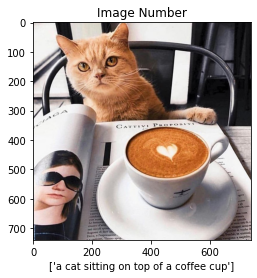

In [7]:
# Plotting the image with it's caption 

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

im_num = 5

plt.title("Image Number")
plt.xlabel(image_details['Image Caption'][im_num])

 
image = mpimg.imread(image_details['Image Location'][im_num])
plt.imshow(image)
plt.show()

In [8]:
#image_details['Image Location'][0]

## Trials


In [ ]:
for i in image_captions:
  print("Image i)

In [ ]:
# import os
# from os import listdir
# from PIL import Image
# def image_list(folder_dir):
#   actual_images=[]
#     # check if the image ends with png or jpg or jpeg
#   im = Image.open(images)
#   im.show()
#   im

# image_list('/content/gdrive/My Drive/Image_Captioning')


In [ ]:
# # import the modules
# import os
# from os import listdir



# # get the path or directory

# def image_list(folder_dir):
#   actual_images=[]
#   for images in os.listdir(folder_dir):  
#       # check if the image ends with png or jpg or jpeg
#       if (images.endswith(".png") or images.endswith(".jpg")\
#           or images.endswith(".jpeg")):
#           # display
#           actual_images.append(images)
#           print(actual_images)
#           print(images)
#           break

# image_list("/content/gdrive/My Drive/Image_Captioning")


In [ ]:
# !pip install glob
# import glob

# folders = glob.glob("/content/gdrive/My Drive/Image_Captioning/")
# imagenames_list = []
# for folder in folders:
#   print("Folder",folder)
#   for f in glob.glob(folder+'*.jpg'):
#     print("F",f)
#     imagenames_list.append(f)

# print("abcd",imagenames_list)

In [ ]:
# from PIL import Image
# for i in imagenames_list:
#   w = Image.open(i)
  


In [ ]:
# def predict_step(image_paths):
#   images = []
#   for image_path in image_paths:
#     i_image = Image.open(image_path)
#     print("opened image",i_image)
#     if i_image.mode != "RGB":
#       i_image = i_image.convert(mode="RGB")